# **Bài tập 1**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('cleveland.csv', header = None)

df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [ ]:
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
            'fbs', 'restecg', 'thalach', 'exang',
            'oldpeak', 'slope', 'ca', 'thal', 'target']


In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


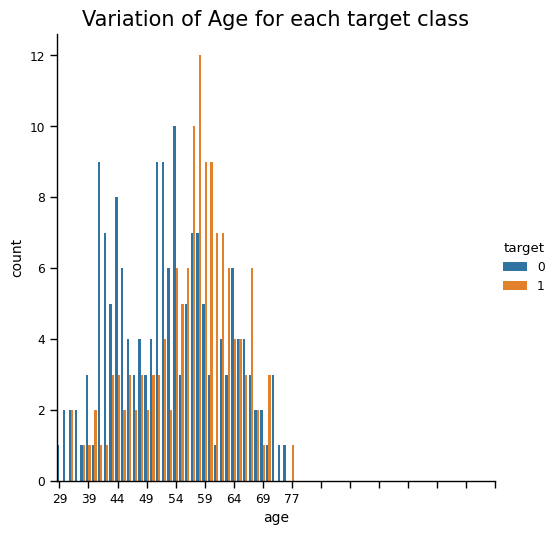

In [ ]:
df['target'] = df['target'].map({0 : 0, 1 : 1, 2 : 1, 3 : 1, 4 : 1})
df['thal'] = df['thal'].fillna(df['thal'].mean())
df['ca'] = df['ca'].fillna(df['ca'].mean())

sns.set_context("paper", font_scale = 1, rc = {"font.size" : 3, 'axes.titlesize': 15, "axes.labelsize" : 10})
ax = sns.catplot(kind = "count", data = df, x = "age", hue = "target", order =df['age'].sort_values().unique())

ax.ax.set_xticks(np.arange(0, 80, 5))
plt.title("Variation of Age for each target class")
plt.show()

# **Bài tập 2**

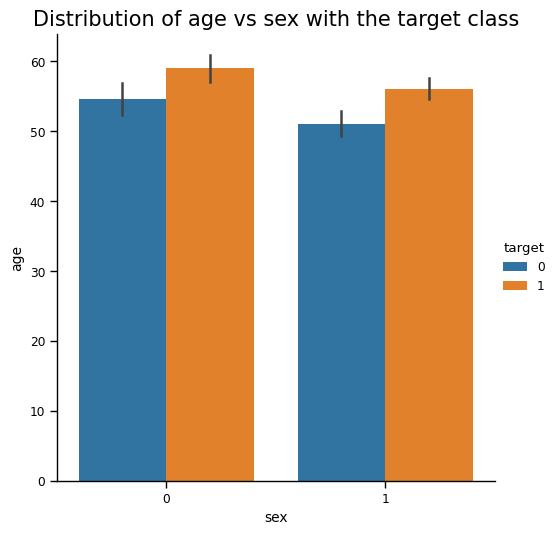

In [ ]:
sns.catplot(kind = 'bar', data = df, x = "sex", y = 'age', hue = 'target')
plt.title("Distribution of age vs sex with the target class")
plt.show()

# **Bài tập 3: KNN**

In [ ]:
from sklearn.model_selection import train_test_split


X = df.iloc[:, : -1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

classifier = KNeighborsClassifier(n_neighbors = 5, weights = "uniform" , algorithm = 'auto', leaf_size = 30, p = 2, metric = 'minkowski')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

y_pred_train = classifier.predict(X_train)

In [ ]:
y_pred_train.shape

(242,)

In [ ]:
y_pred.shape

(61,)

In [ ]:
from sklearn.metrics import confusion_matrix

cm_test = confusion_matrix(y_pred, y_test)

cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)

print("Accuracy for training set for KeighborsClassifier = {}".format(accuracy_for_train))
print("Accuracy for test set for KNeighborsClassifier = {}".format(accuracy_for_test))


Accuracy for training set for KeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [ ]:
cm_test

array([[22, 12],
       [ 7, 20]])

# **Bài tập 4: SVM model**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=42)


In [ ]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 42)

classifier_svm.fit(X_train, y_train)

y_pred = classifier_svm.predict(X_test)
cm_test = confusion_matrix(y_pred, y_test)

y_train_svm = classifier_svm.predict(X_train)
cm_train = confusion_matrix(y_train_svm, y_train)

In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1] )/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1] )/ len(y_test), 2)

print("Accuracy for training set for SVM ={}".format(accuracy_for_train))
print("Accuracy for test set for SVM = {}".format(accuracy_for_test))


Accuracy for training set for SVM =0.66
Accuracy for test set for SVM = 0.67


# **Bài tập 5: Naive Bayes**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.naive_bayes import GaussianNB

classifier_gauss = GaussianNB()
classifier_gauss = classifier_gauss.fit(X_train, y_train)

y_pred_gauss = classifier_gauss.predict(X_test)
cm_test = confusion_matrix(y_pred_gauss, y_test)

y_train_gauss = classifier_gauss.predict(X_train)
cm_train = confusion_matrix(y_train_gauss, y_train)


In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for Naive Bayes = {}".format(accuracy_for_train))
print("Accuracy for test set for Naive Bayes = {}".format(accuracy_for_test))



Accuracy for training set for Naive Bayes = 0.85
Accuracy for test set for Naive Bayes = 0.84


# **Bài tập 6: Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion = "gini", max_depth = 10, min_samples_split = 2, random_state = 42)

dt_classifier = dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred_dt, y_test)

y_train_dt = dt_classifier.predict(X_train)
cm_train = confusion_matrix(y_train_dt, y_train)

In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for Decision Tree  = {}".format(accuracy_for_train))
print("Accuracy for test set for Decision Tree = {}".format(accuracy_for_test))


Accuracy for training set for Decision Tree  = 1.0
Accuracy for test set for Decision Tree = 0.75


# **Bài tập 7: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(criterion = "gini", max_depth = 10, min_samples_split = 2, n_estimators = 10, random_state = 42)
rf_classifier = rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred_rf, y_test)

y_train_rf = rf_classifier.predict(X_train)
cm_train = confusion_matrix(y_train_rf, y_train)

In [ ]:
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for Random Forest = {}".format(accuracy_for_train))
print("Accuracy for test set for Random Forest = {}".format(accuracy_for_test))


Accuracy for training set for Random Forest = 0.98
Accuracy for test set for Random Forest = 0.8


# **Bài tập 8: AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_classifier = AdaBoostClassifier(n_estimators = 50, learning_rate = 1.0)

ada_classifier = ada_classifier.fit(X_train, y_train)

y_pred_ada = ada_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred_ada, y_test)

y_train_ada = ada_classifier.predict(X_train)
cm_train = confusion_matrix(y_train_ada, y_train)

In [ ]:
print()

accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for AdaBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for AdaBoost = {}".format(accuracy_for_test))


Accuracy for training set for AdaBoost = 0.91
Accuracy for test set for AdaBoost = 0.84


# **Bài tập 9: Gradient Boost**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, subsample = 1.0, min_samples_split = 2, max_depth = 3, random_state =3)

gb_classifier = gb_classifier.fit(X_train, y_train)

y_pred_gb = gb_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred_gb, y_test)

y_train_gb = gb_classifier.predict(X_train)
cm_train = confusion_matrix(y_train_gb, y_train)

In [ ]:
print()
accuracy_for_train =  np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test =  np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for Gradient Boost = {}".format(accuracy_for_train))
print("Accuracy for test set for Gradient Boost = {}".format(accuracy_for_test))


Accuracy for training set for Gradient Boost = 1.0
Accuracy for test set for Gradient Boost = 0.85


# **Bài tập 10: XGboost**

In [ ]:
from xgboost import XGBClassifier

xgb_classifier = XGBClassifier(objective = "binary:logistic", random_state = 42, n_estimators = 100)

xgb_classifier = xgb_classifier.fit(X_train, y_train)

y_pred_xgb = xgb_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred_xgb, y_test)

y_train_xgb = xgb_classifier.predict(X_train)
cm_train = confusion_matrix(y_train_xgb, y_train)

In [ ]:
print()
accuracy_for_train =  np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test =  np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for XGBoost = {}".format(accuracy_for_train))
print("Accuracy for test set for XGBoost = {}".format(accuracy_for_test))


Accuracy for training set for XGBoost = 1.0
Accuracy for test set for XGBoost = 0.87


# **Bài tập 11: Stacking**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

dtc = DecisionTreeClassifier(random_state = 42)
rfc = RandomForestClassifier(random_state = 42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(XGBClassifier)
gc = GradientBoostingClassifier(random_state = 42)
svc = SVC(kernel = "rbf", random_state = 42)
ad = AdaBoostClassifier(random_state = 42)


In [ ]:
from sklearn.ensemble import StackingClassifier

estimators = [( 'dtc', dtc), ('rfc', rfc), ('knn', knn), ('gc', gc), ('ad', ad), ('svc', svc)]

xg = XGBClassifier()

stack_classifier = StackingClassifier(estimators = estimators, final_estimator = xg)

In [ ]:
stack_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42)),
                               ('svc', SVC(random_state=42))],
                   final_estimator=XGBClassifier(base_score=None, booster=None,
                                                 callbacks...
                                                 grow_policy=None,
                                                 importance_type=None,
                                                 interaction_constraints=None,
                                                 learning_rate=None,
                                                 max_bin=None,
                                                 max_cat_threshold=None,
                                                 max_cat_to_onehot=None,
                                                 max_delta_step=None,
                                                 max_depth=None,
                                                 max_leaves=None,
                                                 min_child_weight=None,
                                                 missing=nan,
                                                 monotone_constraints=None,
                                                 multi_strategy=None,
                                                 n_estimators=None, n_jobs=None,
                                                 num_parallel_tree=None,
                                                 random_state=None, ...))

In [ ]:
y_pred_stack = stack_classifier.predict(X_test)
cm_test = confusion_matrix(y_pred_stack, y_test)

y_train_stack = stack_classifier.predict(X_train)
cm_train = confusion_matrix(y_train_stack, y_train)

In [ ]:
print()
accuracy_for_train =  np.round((cm_train[0][0] + cm_train[1][1])/ len(y_train), 2)
accuracy_for_test =  np.round((cm_test[0][0] + cm_test[1][1])/ len(y_test), 2)

print("Accuracy for training set for Stacking = {}".format(accuracy_for_train))
print("Accuracy for test set for Stacking = {}".format(accuracy_for_test))


Accuracy for training set for Stacking = 0.92
Accuracy for test set for Stacking = 0.89
